
# Data Visualization with Matplotlib - Exercises 2
### 6421600069 นาย ณภัทรนันท์ ศิลปะ

จงทำตามคำสั่งต่อไปนี้ด้วย data ที่กำหนดให้ต่อไปนี้


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## อ่านไฟล์ Superstore.csv

In [2]:
df = pd.read_csv('Superstore.csv',encoding = 'iso-8859-1')

In [3]:
df.head()

,Order ID,Customer Name,Segment,Day,Month,Year,Ship Mode,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,Darrin Van Huff,Corporate,12,6,2016,Second Class,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Segment        9994 non-null   object 
 3   Day            9994 non-null   int64  
 4   Month          9994 non-null   int64  
 5   Year           9994 non-null   int64  
 6   Ship Mode      9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Category       9994 non-null   object 
 10  Sub-Category   9994 non-null   object 
 11  Product Name   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9994 non-null   int64  
 14  Discount       9994 non-null   float64
 15  Profit         9994 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


## Exercise 1

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 และตกแต่งให้สวยงาม


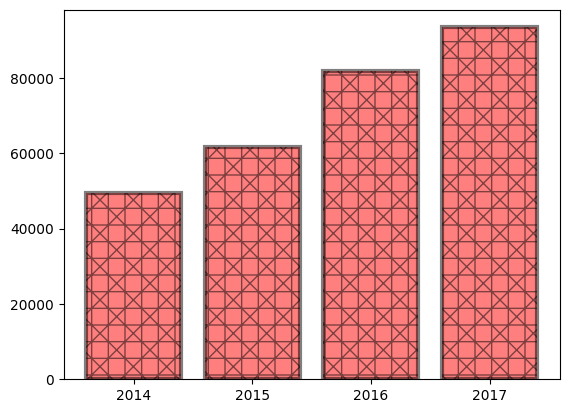

In [5]:
df1 = df.groupby('Year')['Profit'].sum()
a = df1.index
b = df1

plt.bar(a, b, color = 'r',alpha=0.5,hatch = '\/-|',lw=3 ,ec='k')
plt.xticks(a)
plt.show()

## Exercise 2

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 ในกราฟเดียวแยกตามหมวดหมู่ พร้อมตกแต่งให้สวยงาม

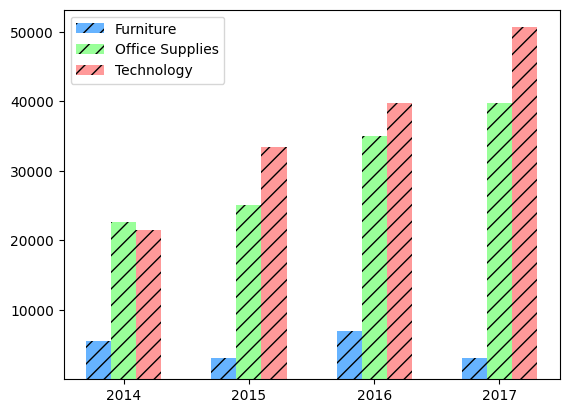

In [6]:
arr_df = {}
for i in range(0, df['Category'].nunique()):
    arr_df[df['Category'].unique()[i]] = df[df['Category'] == df['Category'].unique()[i]].groupby('Year').sum()['Profit']

x = arr_df['Furniture'].index
y_Furniture = arr_df['Furniture']
y_Office = arr_df['Office Supplies']
y_Tech = arr_df['Technology']

# Plot each bar plot separately
plt.bar(x - 0.2, y_Furniture, width=0.2, label='Furniture', color='#66b3ff', align='center',hatch = '//')
plt.bar(x, y_Office, width=0.2, label='Office Supplies', color='#99ff99', align='center',hatch = '//')
plt.bar(x + 0.2, y_Tech, width=0.2, label='Technology', color='#ff9999', align='center',hatch = '//')

plt.yticks(np.arange(10000, 60000, 10000))
plt.xticks([2014, 2015, 2016, 2017])
plt.legend(loc='best')
plt.show()


## Exercise 3

จงวาดกราฟวงกลม แสดงเปอร์เซ็นต์การขนส่งแต่ละแบบ ( Ship Mode ) พร้อมตกแต่งให้สวยงาม

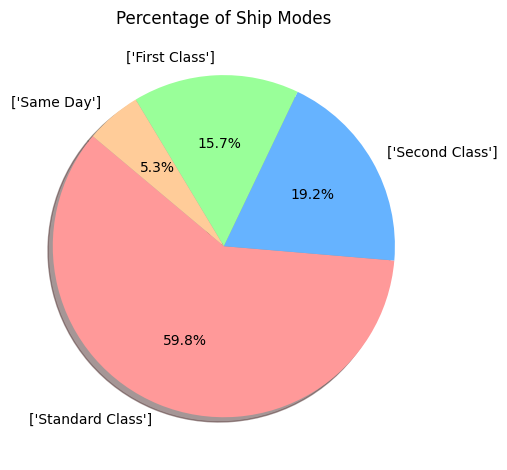

In [10]:
ship_mode_counts = df.groupby('Order ID')['Ship Mode'].unique().value_counts()
plt.figure()

ship_mode_counts.index
plt.pie(ship_mode_counts, labels=ship_mode_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],shadow= True)

plt.title('Percentage of Ship Modes')
plt.tight_layout()

plt.show()

## Exercise 4

จงวาดกราฟความถี่ แสดงจำนวนการขนส่งแต่ละแบบ ( Ship Mode ) พร้อมตกแต่งให้สวยงาม

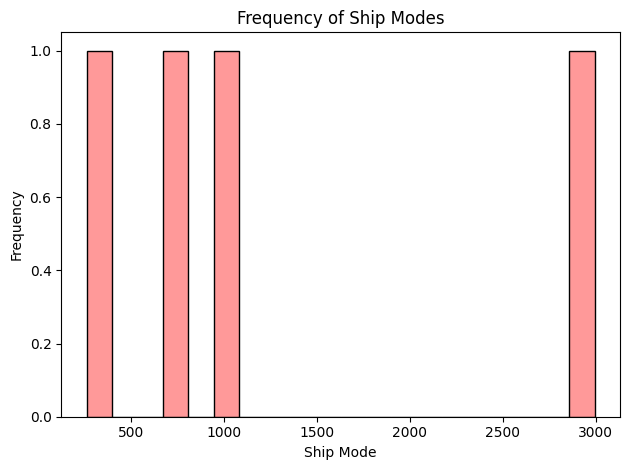

In [18]:
plt.figure()
ship_mode_counts.plot(kind='hist', color='#ff9999',bins=20 ,ec='k')

plt.title('Frequency of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Exercise 5

จงวาดกราฟจุด(Scatter) แสดงราคาขายกับกำไรที่ได้ (Sales , Profit) พร้อมตกแต่งให้สวยงาม

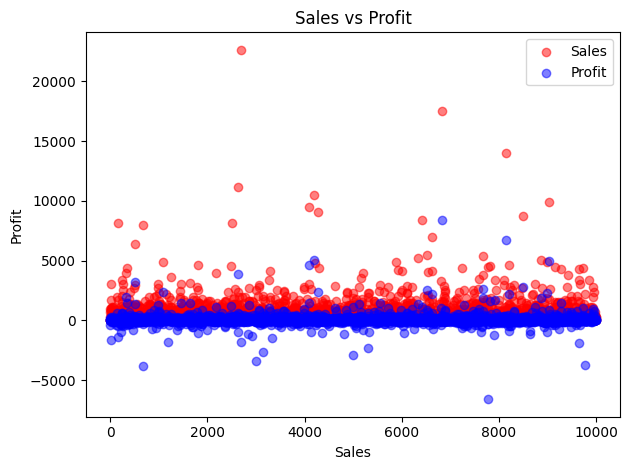

In [30]:
plt.figure()
plt.scatter(df['Sales'].index,df['Sales'] , color='red', alpha=0.5,label = 'Sales')
plt.scatter(df['Profit'].index,df['Profit'] , color='blue', alpha=0.5,label = 'Profit')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(loc='best')

plt.tight_layout()
plt.show()